<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:

1. Pertama, diambil suatu datum pada data yang telah dikelompokkan oleh jennis-jenis tertentu. Lalu, datum tersebut ingin dicari pada kelompok apa ia berada. Caranya, dari acuan datum itu, dicari datum-datum lain yang letaknya/dimensinya/koordinatnya berdekatan dengan datum acuan tersebut. Diperumumkan data ini diplot pada koordinat kartesius. Pencarian datum-datum terdekat tadi, dinamakan metode algoritma KNN, yang biasanya mengaplikasikan Euclidean Distance pada matematika geometri.
2. a. Sangat sensitif terhadap data pencilan
   b. KNN menjadi ambigu bila k genap, namun kebetulan terdapat sejumlah datum genap, pada beberapa kelompok tertentu, yang
   jumlah nya sama rata.

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [91]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data (memisahkan data feature dangan data target)
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [92]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [93]:
#from scipy import stats

#p = stats.zscore(X_train)

#print(np.where(p>4))
#p[8][4]

In [134]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
k_near_uni = [0 for k in range(21)]
k_near_dis = [0 for k in range(21)]

for i in range(2,21):
    k_near_uni[i] = KNeighborsClassifier(n_neighbors = i,weights ='uniform', p = 2)

for j in range(2,21):
    k_near_dis[j] = KNeighborsClassifier(n_neighbors = j,weights ='distance', p = 2)

In [135]:
for i in range(2,21):
    k_near_uni[i].fit(X_train,y_train)
for j in range(2,21):
    k_near_dis[j].fit(X_train, y_train)

Unform Scores :
0.6944444444444444
0.8055555555555556
0.7222222222222222
0.6666666666666666
0.6388888888888888
0.75
0.6388888888888888
0.6944444444444444
0.6944444444444444
0.7222222222222222
0.6388888888888888
0.6666666666666666
0.6388888888888888
0.6666666666666666
0.6111111111111112
0.6666666666666666
0.6388888888888888
0.6666666666666666
0.6111111111111112

Distance Scores : 
0.75
0.8333333333333334
0.7777777777777778
0.75
0.7222222222222222
0.75
0.6944444444444444
0.7222222222222222
0.6944444444444444
0.6944444444444444
0.6944444444444444
0.6944444444444444
0.6944444444444444
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666


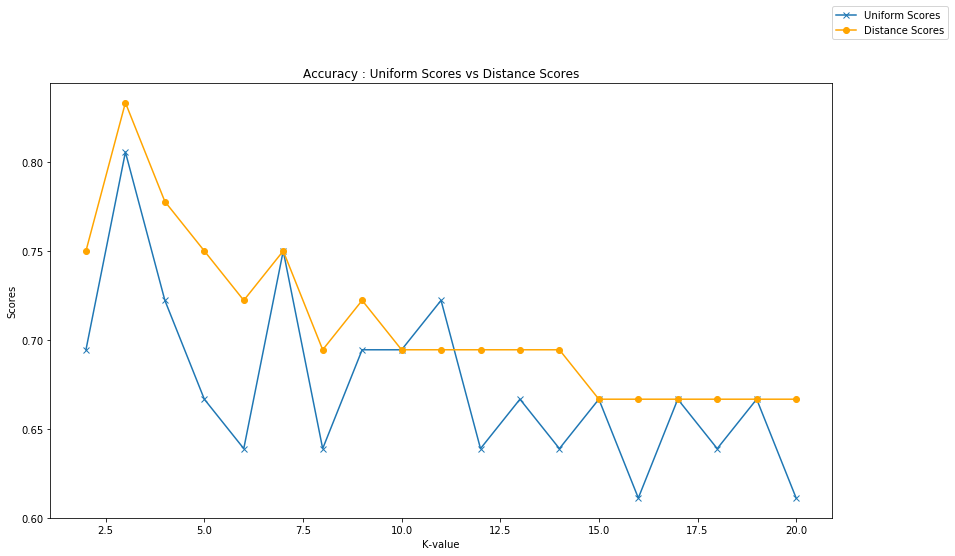

In [136]:
from sklearn.metrics import accuracy_score

uni_scores = [0 for i in range(19)]
dis_scores = [0 for i in range(19)]

for i in range(2,21):
    X_testpred = k_near_uni[i].predict(X_test)
    uni_scores[i-2]=accuracy_score(X_testpred,y_test, normalize =True)
    
for i in range(2,21):
    X_testpred1 = k_near_dis[i].predict(X_test)
    dis_scores[i-2]=accuracy_score(X_testpred1,y_test, normalize =True)
    
print("Unform Scores :")
print(*uni_scores, sep="\n")

print("\nDistance Scores : ")
print(*dis_scores, sep="\n")

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,21), uni_scores, marker="x", label = "Uniform Scores")
ax.plot(range(2,21), dis_scores, color="orange", marker="o", label="Distance Scores")
ax.set_title("Accuracy : Uniform Scores vs Distance Scores")
ax.set_xlabel("K-value")
ax.set_ylabel("Scores")
ax.legend(loc=(1,1.1))


Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [156]:
import numpy as np
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4) 
y = np.array([0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [174]:
#Membuat hyperparameter
model_lr = LinearRegression(fit_intercept=True)

#Fit dan prediksi data
model_lr.fit(X,y)
y_predict = model_lr.predict(X)

0.5000000016247697

In [175]:
#Memperoleh nilai koefisien hasil prediksi vektor X
model_lr.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [177]:
#Memperoleh nilai intercepthasil prediksi
model_lr.intercept_

0.5000000016247697